In [1]:
import pandas as pd
import seaborn as sb
import numpy as np
import matplotlib.pyplot as plt
sb.set()

In [2]:
# Import the data set
DAM_CustSeg = pd.read_csv('CustomerSegmentation.csv')

In [3]:
DAM_CustSeg = DAM_CustSeg.iloc[: , 1:]

In [4]:
DAM_CustSeg.dropna(axis='index', inplace = True)
DAM_CustSeg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8819 entries, 0 to 10694
Data columns (total 10 columns):
Gender             8819 non-null object
Ever_Married       8819 non-null object
Age                8819 non-null int64
Graduated          8819 non-null object
Profession         8819 non-null object
Work_Experience    8819 non-null float64
Spending_Score     8819 non-null object
Family_Size        8819 non-null float64
Var_1              8819 non-null object
Segmentation       8819 non-null object
dtypes: float64(2), int64(1), object(7)
memory usage: 757.9+ KB


In [5]:
DAM_CustSeg = DAM_CustSeg.replace('Male',0)
DAM_CustSeg = DAM_CustSeg.replace('Female',1)
DAM_CustSeg = DAM_CustSeg.replace('No',0)
DAM_CustSeg = DAM_CustSeg.replace('Yes',1)
DAM_CustSeg = DAM_CustSeg.replace('A',1)
DAM_CustSeg = DAM_CustSeg.replace('B',2)
DAM_CustSeg = DAM_CustSeg.replace('C',3)
DAM_CustSeg = DAM_CustSeg.replace('D',4)
DAM_CustSeg = DAM_CustSeg.replace('Healthcare',0)
DAM_CustSeg = DAM_CustSeg.replace('Engineer',1)
DAM_CustSeg = DAM_CustSeg.replace('Lawyer',2)
DAM_CustSeg = DAM_CustSeg.replace('Artist',3)
DAM_CustSeg = DAM_CustSeg.replace('Doctor',4)
DAM_CustSeg = DAM_CustSeg.replace('Homemaker',5)
DAM_CustSeg = DAM_CustSeg.replace('Entertainment',6)
DAM_CustSeg = DAM_CustSeg.replace('Marketing',7)
DAM_CustSeg = DAM_CustSeg.replace('Executive',8)
DAM_CustSeg = DAM_CustSeg.replace('Low',1)
DAM_CustSeg = DAM_CustSeg.replace('Average',2)
DAM_CustSeg = DAM_CustSeg.replace('High',3)
DAM_CustSeg = DAM_CustSeg.replace('Cat_1',1)
DAM_CustSeg = DAM_CustSeg.replace('Cat_2',2)
DAM_CustSeg = DAM_CustSeg.replace('Cat_3',3)
DAM_CustSeg = DAM_CustSeg.replace('Cat_4',4)
DAM_CustSeg = DAM_CustSeg.replace('Cat_5',5)
DAM_CustSeg = DAM_CustSeg.replace('Cat_6',6)
DAM_CustSeg = DAM_CustSeg.replace('Cat_7',7)

In [6]:
gender = pd.DataFrame(DAM_CustSeg['Gender'])
married = pd.DataFrame(DAM_CustSeg['Ever_Married'])
age = pd.DataFrame(DAM_CustSeg['Age'])
graduated = pd.DataFrame(DAM_CustSeg['Graduated'])
profession = pd.DataFrame(DAM_CustSeg['Profession'])
experience = pd.DataFrame(DAM_CustSeg['Work_Experience'])
spending = pd.DataFrame(DAM_CustSeg['Spending_Score'])
family = pd.DataFrame(DAM_CustSeg['Family_Size'])
var_1 = pd.DataFrame(DAM_CustSeg['Var_1'])
segmentation = pd.DataFrame(DAM_CustSeg['Segmentation'])

In [7]:
DAM_CustSeg = DAM_CustSeg.astype({"Gender":'category', "Ever_Married": 'category', "Graduated": 'category', "Profession": 'category', "Work_Experience": 'int64',"Spending_Score":'category',"Family_Size":'int64',"Var_1":'category',"Segmentation":'category'})

In [8]:
DAM_CustSeg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8819 entries, 0 to 10694
Data columns (total 10 columns):
Gender             8819 non-null category
Ever_Married       8819 non-null category
Age                8819 non-null int64
Graduated          8819 non-null category
Profession         8819 non-null category
Work_Experience    8819 non-null int64
Spending_Score     8819 non-null category
Family_Size        8819 non-null int64
Var_1              8819 non-null category
Segmentation       8819 non-null category
dtypes: category(7), int64(3)
memory usage: 337.2 KB


# Uni Variate Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

# Function to calculate decision tree accuracies for individual factors
def acc_score (X):
    # Split the Dataset into Train and Test
    x_train, x_test, y_train, y_test = train_test_split(X, segmentation, test_size = 0.25)
    # Decision Tree using Train Data
    dectree = DecisionTreeClassifier(max_depth = None)  # Create the decision tree object
    dectree.fit(x_train, y_train)  
    return dectree.score(x_test, y_test)

In [10]:
score = [acc_score(gender), acc_score(married), acc_score(age), acc_score(graduated), acc_score(profession), 
         acc_score(experience), acc_score(spending), acc_score(family), acc_score(var_1)]        
score_factors = pd.DataFrame(score, columns = ['Accuracy Score'], 
                      index = ['gender', 'married', 'age', 'graduated','profession','experience','spending',
                               'family', 'var_1'])
score_factors.sort_values(by = 'Accuracy Score')

,Accuracy Score
experience,0.255329
gender,0.283447
var_1,0.286168
family,0.347846
graduated,0.354195
married,0.368707
spending,0.389116
age,0.401361
profession,0.419501


# Multivariate Decision Tree

In [11]:
# Concat all the individual factors
factors2 = pd.concat([gender, married, age, graduated,profession,experience,spending,
                               family, var_1], sort = False, axis = 1)
factors2.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,0,0,22,0,0,1.0,1,4.0,4
2,1,1,67,1,1,1.0,1,1.0,6
3,0,1,67,1,2,0.0,3,2.0,6
5,0,1,56,0,3,0.0,2,2.0,6
6,0,0,32,1,0,1.0,1,3.0,6


In [12]:
y = segmentation
X = pd.DataFrame(factors2)

In [13]:
# Split the Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

print("Train Set :", y_train.shape, X_train.shape)
print("Test Set  :", y_test.shape, X_test.shape)

Train Set : (6614, 1) (6614, 9)
Test Set  : (2205, 1) (2205, 9)


In [14]:
from sklearn.tree import DecisionTreeClassifier

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 4)  # Create the decision tree object
# Fit Decision Tree on Train Data 
dectree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.4685515573026912

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.4485260770975057



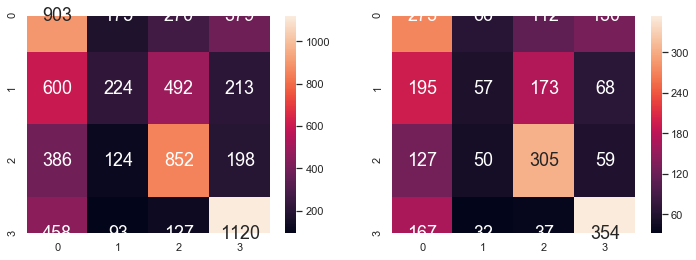

In [15]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Random Forest

In [16]:
# Import RandomForestClassifier model from Scikit-Learn
from sklearn.ensemble import RandomForestClassifier

# Create the Random Forest object
rforest = RandomForestClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                 bootstrap = True,
                                max_features = 'sqrt') 

# Fit Random Forest on Train Data
rforest.fit(X_train, y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.9401270033262776

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.4240362811791384



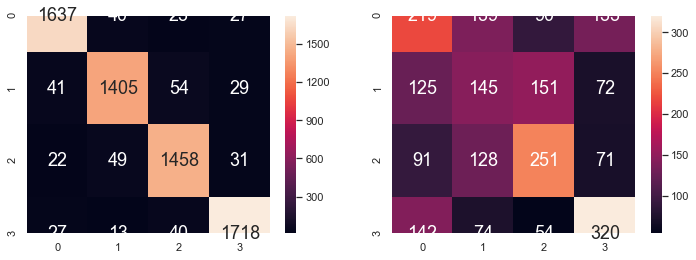

In [17]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = rforest.predict(X_train)
y_test_pred = rforest.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Logistic Regression

In [18]:
# Import Logistic Regression model from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
LR = LogisticRegression()
# Fit Logistic Regression on Train Data 
LR.fit(X_train,y_train.values.ravel())

C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.4277290595706078

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.4240362811791384



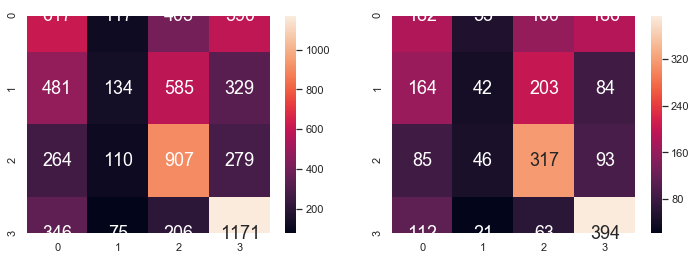

In [19]:
y_train_pred = LR.predict(X_train)
y_test_pred = LR.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0]) 

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# K-Nearest Neighbours

In [20]:
# Import KNN model from sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
KNN = KNeighborsClassifier(n_neighbors=81) # k = squareroot N, where N is the number of training data (sqrt(0.75x8819))
KNN.fit(X_train,y_train.values.ravel())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=81, p=2,
                     weights='uniform')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.4553976413667977

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.42086167800453517



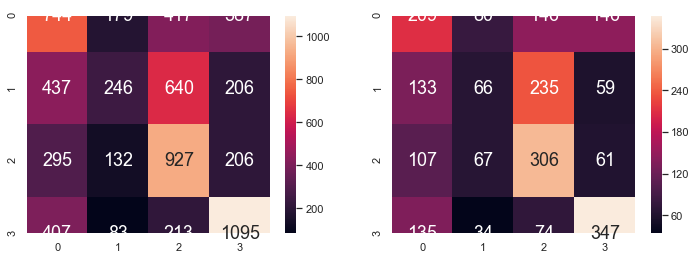

In [21]:
y_train_pred = KNN.predict(X_train)
y_test_pred = KNN.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Gradient Boosting

In [22]:
# Import GradientBoostingClassifier model from Scikit-Learn
from sklearn.ensemble import GradientBoostingClassifier

gradboost = GradientBoostingClassifier(n_estimators = 100,  # n_estimators denote number of trees
                                      max_depth = 2,        # Set the maximum depth of each tree
                                      learning_rate = 0.1)  # Learning_rate shrinks the contribution of each tree   

# Fit Gradient Boosting model on Train Data
gradboost.fit(X_train, y_train.values.ravel())

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=2,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.5066525551859692

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.4707482993197279



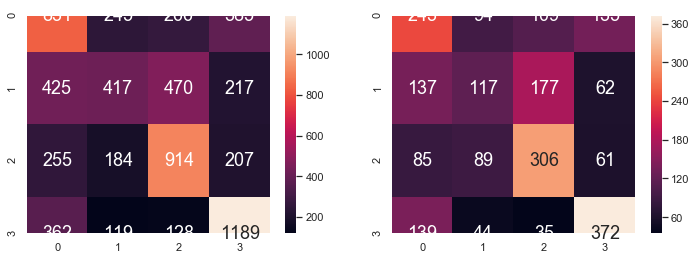

In [23]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = gradboost.predict(X_train)
y_test_pred = gradboost.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()


# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# XG Boost

In [24]:
# Import XGBClassifier model from Scikit-Learn
from xgboost import XGBClassifier

xgb = XGBClassifier(n_estimators = 100,     # n_estimators denote number of trees
                    max_depth = 2,          # Set the maximum depth of each tree
                    gamma=0,                # Regularization parameter: min loss reduction required to make a further partition on a leaf node of the tree
                    learning_rate = 0.1,  # Learning_rate shrinks the contribution of each tree   
                    colsample_bytree = 0.3) # Subsample ratio by number of columns when constructing each tree

# Fit XGBoost on Train Data 
xgb.fit(X_train, y_train.values.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.3, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy f1 	: 0.4872996673722407

Goodness of Fit of Model 	Test Dataset
Classification Accuracy f1 	: 0.4671201814058957



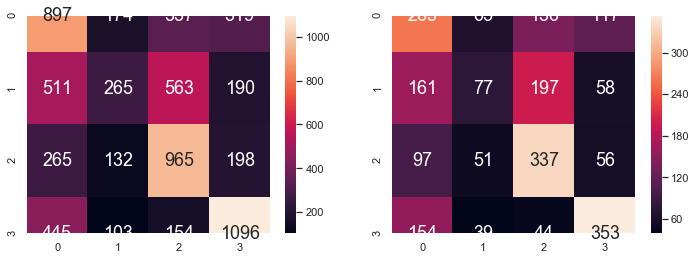

In [25]:
# Import confusion_matrix from Scikit-Learn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_train, y_train_pred, average = 'micro'))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy f1 \t:", f1_score(y_test, y_test_pred, average = 'micro'))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])

sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

# Neural Network

C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	: 0.4974296945872392

Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	: 0.47165532879818595


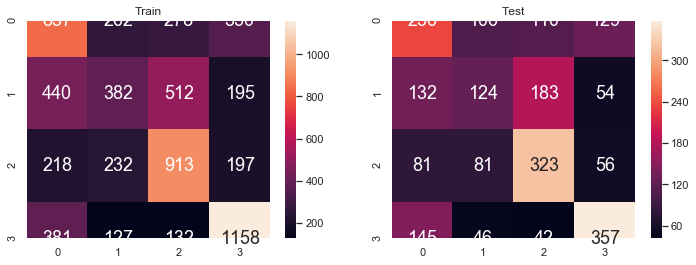

In [26]:
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

# Fit only to the training data
scaler = StandardScaler()
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# MLP neural network
mlp = MLPClassifier(hidden_layer_sizes=(12,12,12),max_iter=600)
mlp.fit(X_train,y_train)

y_train_pred = mlp.predict(X_train)
y_test_pred = mlp.predict(X_test)

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
axes[0].set_title('Train')
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])
axes[1].set_title('Test')


# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", mlp.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", mlp.score(X_test, y_test))

# Support Vector Machine

In [27]:
from sklearn import svm
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\elroy\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [28]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [29]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)

Accuracy Linear Kernel: 0.4095238095238095
Accuracy Polynomial Kernel: 0.45170068027210886
Accuracy Radial Basis Kernel: 0.44761904761904764
Accuracy Sigmoid Kernel: 0.3360544217687075
